In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
bank_df=pd.read_csv("bank-full.csv")
bank_df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no

In [4]:
#Imported shape is correct as per given data
bank_df.shape

(45211, 17)

In [5]:
#most of the features are of int and object type
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
#there are no blanks in data
bank_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [7]:
bank_df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

Feature Name:  job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64 

Feature Name:  marital
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64 

Feature Name:  education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64 

Feature Name:  default
no     44396
yes      815
Name: default, dtype: int64 

Feature Name:  housing
yes    25130
no     20081
Name: housing, dtype: int64 

Feature Name:  loan
no     37967
yes     7244
Name: loan, dtype: int64 

Feature Name:  contact
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64 

Feature Name:  month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     264

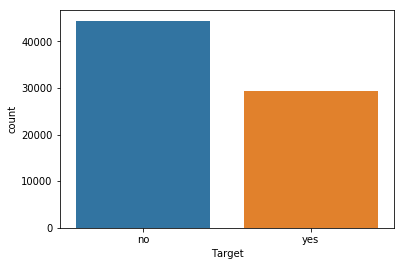

In [8]:
#All object type feature freq check
bank_df_obj=pd.DataFrame(bank_df.select_dtypes(include='object'))
for col in bank_df_obj.columns:
    print("Feature Name: ", col)
    sns.countplot(bank_df[col])
    print(bank_df_obj[col].value_counts(),"\n")


## UNIVARIATE ANALYSIS

               counts  percent
blue-collar      9732     21.5
management       9458     20.9
technician       7597     16.8
admin.           5171     11.4
services         4154      9.2
retired          2264      5.0
self-employed    1579      3.5
entrepreneur     1487      3.3
unemployed       1303      2.9
housemaid        1240      2.7
student           938      2.1
unknown           288      0.6


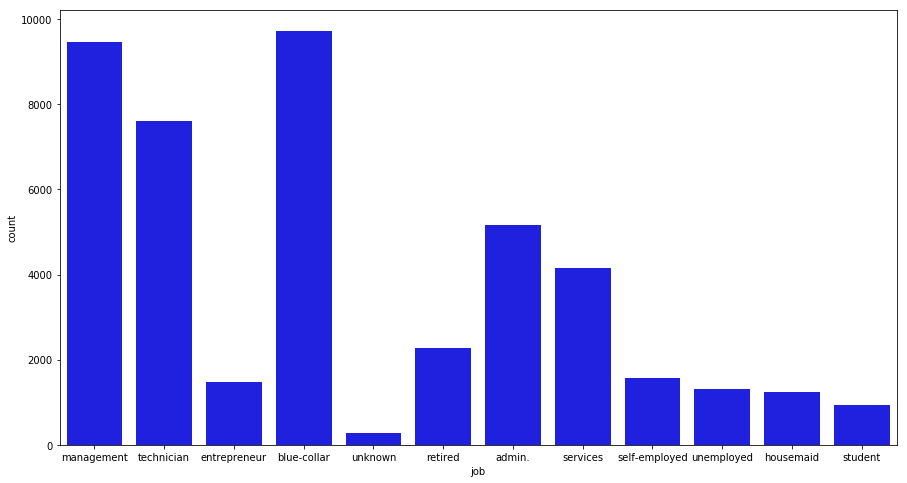

In [9]:
#job analysis
s=bank_df.job
counts=s.value_counts()
percent=s.value_counts(normalize=True).mul(100).round(1)
print(pd.DataFrame({'counts':counts,'percent':percent}))
plt.figure(figsize=(15,8))
sns.countplot(bank_df['job'],color='blue')

          counts  percent
married    27214     60.2
single     12790     28.3
divorced    5207     11.5


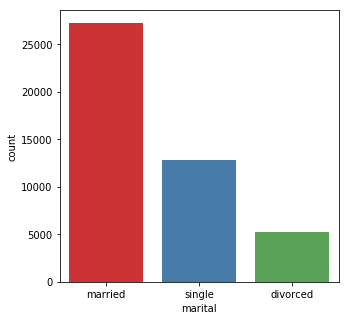

In [10]:
#marital analysis
s=bank_df.marital
counts=s.value_counts()
percent=s.value_counts(normalize=True).mul(100).round(1)
print(pd.DataFrame({'counts':counts,'percent':percent}))
plt.figure(figsize=(5,5))
sns.countplot(bank_df['marital'],palette='Set1')

           counts  percent
secondary   23202     51.3
tertiary    13301     29.4
primary      6851     15.2
unknown      1857      4.1


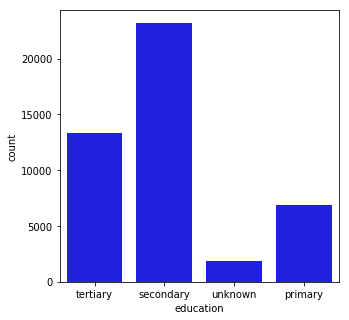

In [11]:
#education analysis
s=bank_df.education
counts=s.value_counts()
percent=s.value_counts(normalize=True).mul(100).round(1)
print(pd.DataFrame({'counts':counts,'percent':percent}))
plt.figure(figsize=(5,5))
sns.countplot(bank_df['education'],color='blue')

     counts  percent
no    44396     98.2
yes     815      1.8


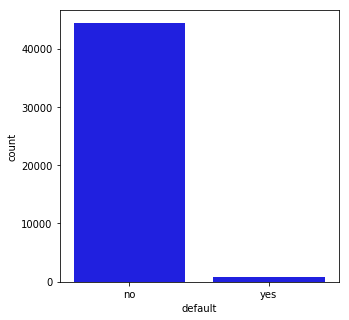

In [12]:
#default analysis - yes percentage is very low, need to inspet furhter to include in analysius or not
s=bank_df.default
counts=s.value_counts()
percent=s.value_counts(normalize=True).mul(100).round(1)
print(pd.DataFrame({'counts':counts,'percent':percent}))
plt.figure(figsize=(5,5))
sns.countplot(bank_df['default'],color='blue')

     counts  percent
yes   25130     55.6
no    20081     44.4


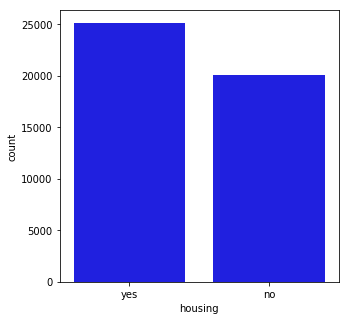

In [13]:
#housing analysis
s=bank_df.housing
counts=s.value_counts()
percent=s.value_counts(normalize=True).mul(100).round(1)
print(pd.DataFrame({'counts':counts,'percent':percent}))
plt.figure(figsize=(5,5))
sns.countplot(bank_df['housing'],color='blue')

     counts  percent
no    37967     84.0
yes    7244     16.0


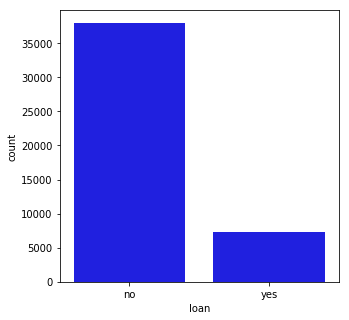

In [14]:
#loan analysis
s=bank_df.loan
counts=s.value_counts()
percent=s.value_counts(normalize=True).mul(100).round(1)
print(pd.DataFrame({'counts':counts,'percent':percent}))
plt.figure(figsize=(5,5))
sns.countplot(bank_df['loan'],color='blue')

           counts  percent
cellular    29285     64.8
unknown     13020     28.8
telephone    2906      6.4


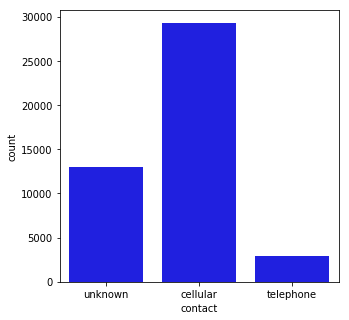

In [15]:
#contact analysis
s=bank_df.contact
counts=s.value_counts()
percent=s.value_counts(normalize=True).mul(100).round(1)
print(pd.DataFrame({'counts':counts,'percent':percent}))
plt.figure(figsize=(5,5))
sns.countplot(bank_df['contact'],color='blue')

    counts  percent
20    2752      6.1
18    2308      5.1
21    2026      4.5
17    1939      4.3
6     1932      4.3
5     1910      4.2
14    1848      4.1
8     1842      4.1
28    1830      4.0
7     1817      4.0
19    1757      3.9
29    1745      3.9
15    1703      3.8
12    1603      3.5
13    1585      3.5
30    1566      3.5
9     1561      3.5
11    1479      3.3
4     1445      3.2
16    1415      3.1
2     1293      2.9
27    1121      2.5
3     1079      2.4
26    1035      2.3
23     939      2.1
22     905      2.0
25     840      1.9
31     643      1.4
10     524      1.2
24     447      1.0
1      322      0.7


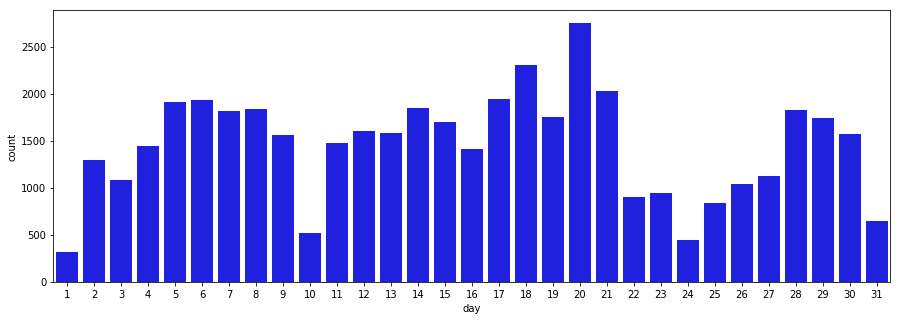

In [16]:
#day analysis
s=bank_df.day
counts=s.value_counts()
percent=s.value_counts(normalize=True).mul(100).round(1)
print(pd.DataFrame({'counts':counts,'percent':percent}))
plt.figure(figsize=(15,5))
sns.countplot(bank_df['day'],color='blue')

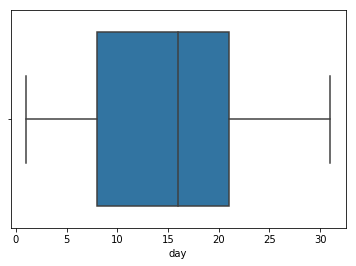

In [17]:
sns.boxplot(bank_df['day'])

     counts  percent
may   13766     30.4
jul    6895     15.3
aug    6247     13.8
jun    5341     11.8
nov    3970      8.8
apr    2932      6.5
feb    2649      5.9
jan    1403      3.1
oct     738      1.6
sep     579      1.3
mar     477      1.1
dec     214      0.5


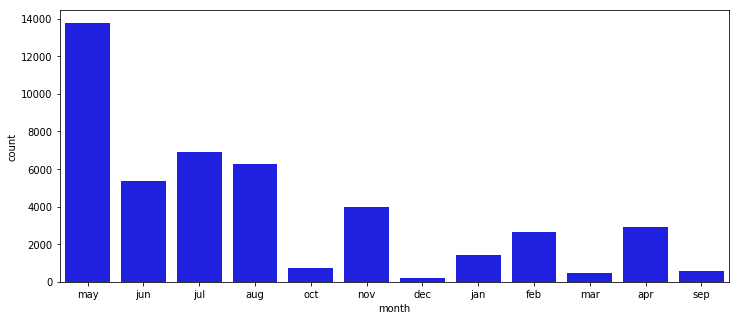

In [18]:
#month analysis - max respondent connected in may month
s=bank_df.month
counts=s.value_counts()
percent=s.value_counts(normalize=True).mul(100).round(1)
print(pd.DataFrame({'counts':counts,'percent':percent}))
plt.figure(figsize=(12,5))
sns.countplot(bank_df['month'],color='blue')

         counts  percent
unknown   36959     81.7
failure    4901     10.8
other      1840      4.1
success    1511      3.3


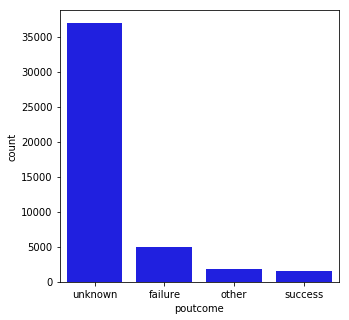

In [19]:
#poutcome analysis - most data is unkown, need to check if could be used in further analysis
s=bank_df.poutcome
counts=s.value_counts()
percent=s.value_counts(normalize=True).mul(100).round(1)
print(pd.DataFrame({'counts':counts,'percent':percent}))
plt.figure(figsize=(5,5))
sns.countplot(bank_df['poutcome'],color='blue')

     counts  percent
no    39922     88.3
yes    5289     11.7


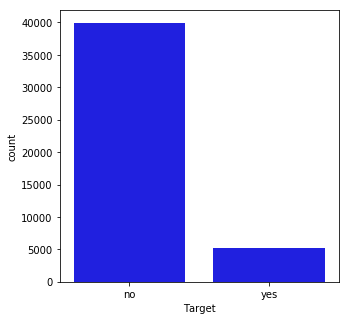

In [20]:
#Target analysis - those subscribed for term deposit are very low. Data has imbalance but will continue with same 
#as this represents original picture of data. Subscription to product (term deposit in this case) 
#tend to be on lower side
s=bank_df.Target
counts=s.value_counts()
percent=s.value_counts(normalize=True).mul(100).round(1)
print(pd.DataFrame({'counts':counts,'percent':percent}))
plt.figure(figsize=(5,5))
sns.countplot(bank_df['Target'],color='blue')

In [21]:
bank_df.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

AxesSubplot(0.125,0.125;0.775x0.755)
Skweness is:  0.6848179257252598


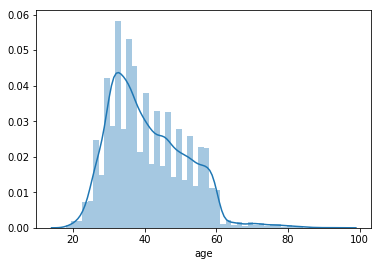

In [22]:
#Age, data is moderately skewed.
print(sns.distplot(bank_df.age))
print("Skweness is: ",bank_df['age'].skew())

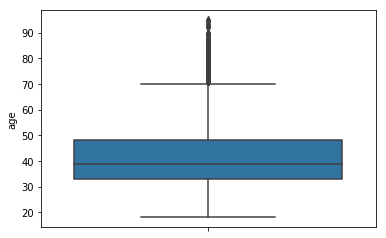

In [23]:
sns.boxplot(y='age',data=bank_df)

AxesSubplot(0.125,0.125;0.775x0.755)
Skweness is:  8.360308326166326


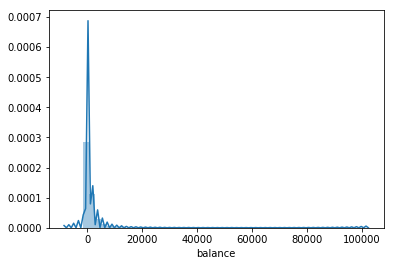

In [24]:
#balance, is highly skewed and contains lot of outliers.
print(sns.distplot(bank_df.balance))
print("Skweness is: ",bank_df['balance'].skew())

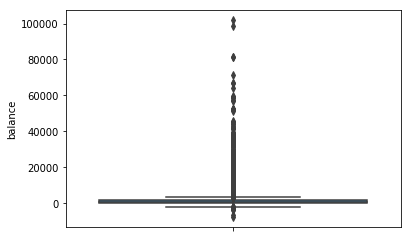

In [25]:
#clearly there are large number of ourliers and needs to be celaned. Using mean +_3*std for cleaning outliers
sns.boxplot(y='balance',data=bank_df)

AxesSubplot(0.125,0.125;0.775x0.755)
Skweness is:  0.09307901402122411


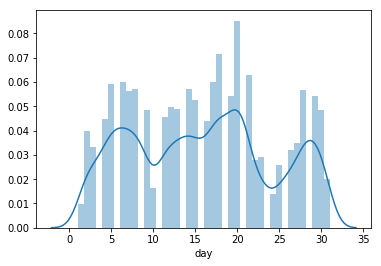

In [26]:
#day seems fine with very low skweness. However its multimodal.
print(sns.distplot(bank_df.day))
print("Skweness is: ",bank_df['day'].skew())

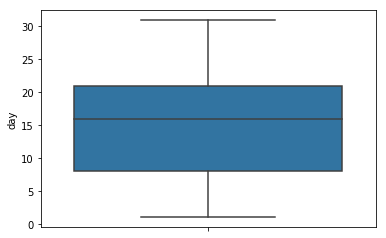

In [27]:
#day seems fine here
sns.boxplot(y='day',data=bank_df)

AxesSubplot(0.125,0.125;0.775x0.755)
Skweness is:  3.144318099423456


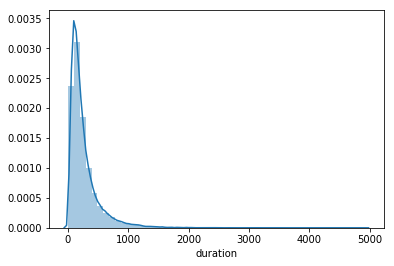

In [28]:
#duration, is highly skewed.
print(sns.distplot(bank_df.duration))
print("Skweness is: ",bank_df['duration'].skew())

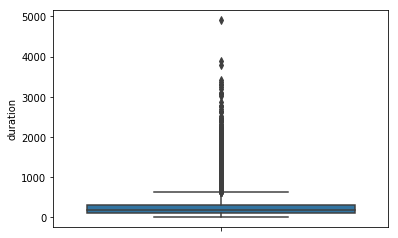

In [29]:
#duration also contains outliers which we need to clean.
#this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also,
#after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the
#intention is to have a realistic predictive model.
#So droping this
sns.boxplot(y='duration',data=bank_df)
#bank_df.drop(['duration'],inplace=True,axis=1)
#bank_df.columns

AxesSubplot(0.125,0.125;0.775x0.755)
Skweness is:  4.898650166179674


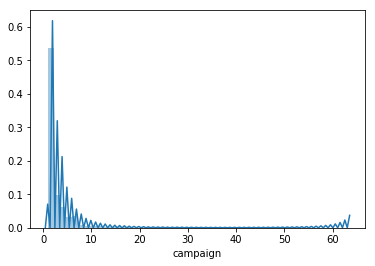

In [30]:
#campaign is highly skewed and has very long tail on right.
print(sns.distplot(bank_df.campaign))
print("Skweness is: ",bank_df['campaign'].skew())

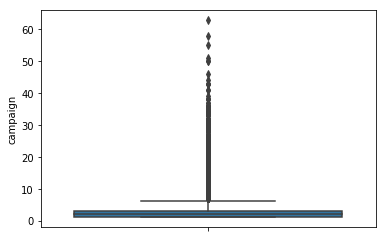

In [31]:
#campaign contains lot of outliers, it needs to be checked. Conatcts made to customer can be high at times.
#thus data needs to be checked
sns.boxplot(y='campaign',data=bank_df)

AxesSubplot(0.125,0.125;0.775x0.755)
Skweness is:  2.6157154736563477


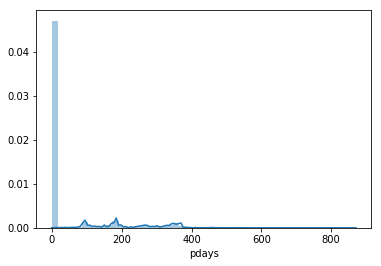

In [32]:
#pdays, max respondents has value as -1. However days cant be -1, believe they are ones who were not previously contacted
print(sns.distplot(bank_df.pdays))
print("Skweness is: ",bank_df['pdays'].skew())

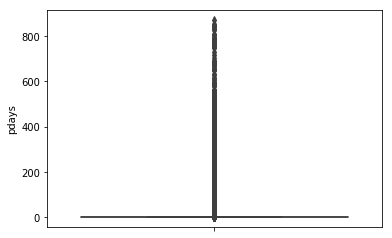

In [33]:
#pdays
sns.boxplot(y='pdays',data=bank_df)

In [34]:
#previous, responses as in pdays -1 are marked as 0 here. 
#They were never contacted in previous marketing campaign hence no contacts performed.
#No of contacts made to customers decrease which is obvious
#cal=bank_df[bank_df['previous']>0]
bank_df['previous'].value_counts()

0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
23         8
20         8
22         6
18         6
24         5
27         5
29         4
25         4
21         4
30         3
28         2
26         2
37         2
38         2
55         1
40         1
35         1
58         1
51         1
41         1
32         1
275        1
Name: previous, dtype: int64

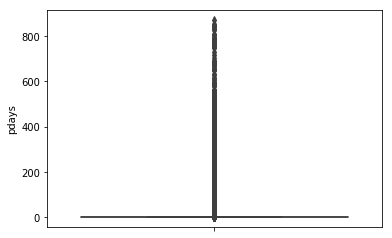

In [35]:
sns.boxplot(y='pdays',data=bank_df)

## BIVARIATE ANALYSIS

In [36]:
#checking mean and median against target variable for all numeric varibale
#those subscribe to term deposit have higher mean and median balance
#those subscribe to term deposit have higher mean and median duration
#those subscribe to term deposit have higher mean pdays, number of days that passed by after the client
#               was last contacted from a previous campaign
#those subscribe to term deposit have higher mean previous, number of contacts performed before this campaign
#those subscribe to term deposit have lower mean campaign, number of contacts performed during this campaign
bank_df.groupby(['Target']).agg(['mean','median'])

age             balance               day           duration  \
             mean median         mean median       mean median        mean   
Target                                                                       
no      40.838986     39  1303.714969    417  15.892290     16  221.182806   
yes     41.670070     38  1804.267915    733  15.158253     15  537.294574   

               campaign             pdays         previous         
       median      mean median       mean median      mean median  
Target                                                             
no        164  2.846350      2  36.421372     -1  0.502154      0  
yes       426  2.141047      2  68.702968     -1  1.170354      0

Target                no        yes
job                                
student        71.321962  28.678038
retired        77.208481  22.791519
unemployed     84.497314  15.502686
management     86.244449  13.755551
admin.         87.797331  12.202669
self-employed  88.157061  11.842939
unknown        88.194444  11.805556
technician     88.943004  11.056996
services       91.116996   8.883004
housemaid      91.209677   8.790323
entrepreneur   91.728312   8.271688
blue-collar    92.725031   7.274969


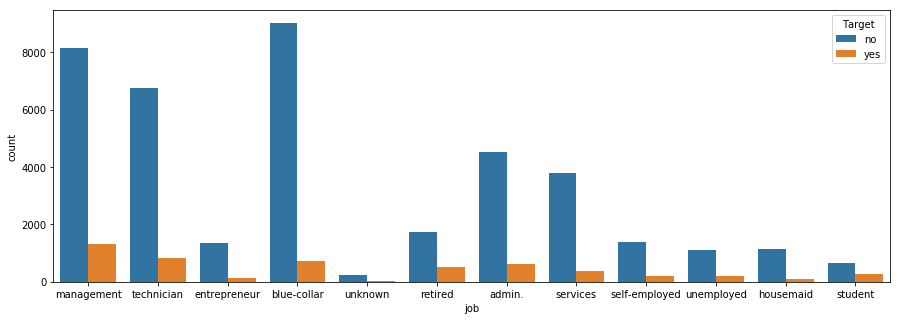

In [37]:
#job - blue collar jobs was the most contacted in marketing campaign however they are the least who subscribed it.
#Student have mostly subscribed term deposit, however they are least contacted in marketing campaign
print(pd.crosstab(bank_df['job'],bank_df['Target'],normalize='index').mul(100).sort_values(by='yes',ascending=False))
plt.figure(figsize=(15,5))
sns.countplot(x='job',hue='Target',data=bank_df)

Target           no        yes
marital                       
single    85.050821  14.949179
divorced  88.054542  11.945458
married   89.876534  10.123466


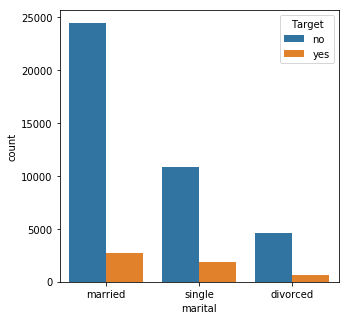

In [38]:
#Married was the most conatcted group however they are the least who subscribed it.
#Single are the most who subscribed for term deposit
print(pd.crosstab(bank_df['marital'],bank_df['Target'],normalize='index').mul(100).sort_values(by='yes',ascending=False))
plt.figure(figsize=(5,5))
sns.countplot(x='marital',hue='Target',data=bank_df)

Target            no        yes
education                      
tertiary   84.993610  15.006390
unknown    86.429725  13.570275
secondary  89.440565  10.559435
primary    91.373522   8.626478


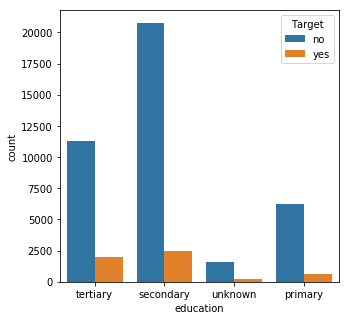

In [39]:
#tertiary education mostly subscribed to term deposit
print(pd.crosstab(bank_df['education'],bank_df['Target'],normalize='index').mul(100).sort_values(by='yes',ascending=False))
plt.figure(figsize=(5,5))
sns.countplot(x='education',hue='Target',data=bank_df)

Target          no        yes
default                      
no       88.203892  11.796108
yes      93.619632   6.380368


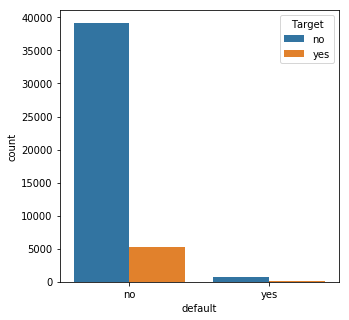

In [40]:
#defaulter/non defaultor- those who subscribed to term deposit is very low. dont believe will add much to our analysis
print(pd.crosstab(bank_df['default'],bank_df['Target'],normalize='index').mul(100).sort_values(by='yes',ascending=False))
plt.figure(figsize=(5,5))
sns.countplot(x='default',hue='Target',data=bank_df)

Target          no        yes
housing                      
no       83.297645  16.702355
yes      92.300040   7.699960


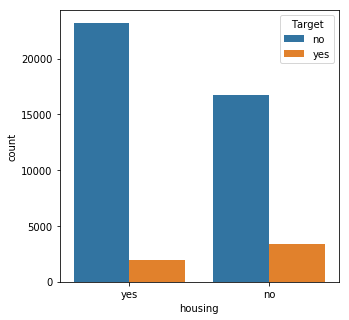

In [41]:
print(pd.crosstab(bank_df['housing'],bank_df['Target'],normalize='index').mul(100).sort_values(by='yes',ascending=False))
plt.figure(figsize=(5,5))
sns.countplot(x='housing',hue='Target',data=bank_df)

Target         no        yes
loan                        
no      87.344273  12.655727
yes     93.318609   6.681391


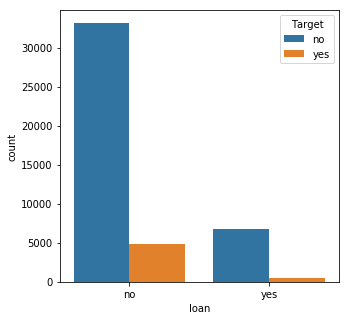

In [42]:
print(pd.crosstab(bank_df['loan'],bank_df['Target'],normalize='index').mul(100).sort_values(by='yes',ascending=False))
plt.figure(figsize=(5,5))
sns.countplot(x='loan',hue='Target',data=bank_df)

Target            no        yes
contact                        
cellular   85.081100  14.918900
telephone  86.579491  13.420509
unknown    95.929339   4.070661


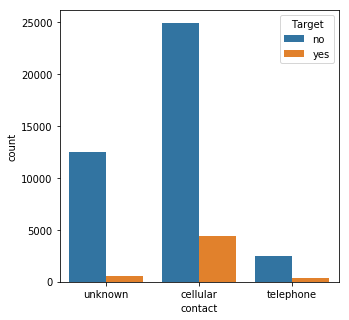

In [43]:
print(pd.crosstab(bank_df['contact'],bank_df['Target'],normalize='index').mul(100).sort_values(by='yes',ascending=False))
plt.figure(figsize=(5,5))
sns.countplot(x='contact',hue='Target',data=bank_df)

Target         no        yes
day                         
1       72.049689  27.950311
10      76.908397  23.091603
30      82.694764  17.305236
22      82.983425  17.016575
3       83.503244  16.496756
4       84.083045  15.916955
25      84.166667  15.833333
12      84.778540  15.221460
13      84.794953  15.205047
2       85.924207  14.075793
15      86.024662  13.975338
24      86.129754  13.870246
16      86.431095  13.568905
23      86.581470  13.418530
27      86.619090  13.380910
11      87.762001  12.237999
9       88.532992  11.467008
14      88.636364  11.363636
5       88.743455  11.256545
26      88.792271  11.207729
8       89.087948  10.912052
21      90.078973   9.921027
18      90.121317   9.878683
6       90.631470   9.368530
17      90.923156   9.076844
7       91.359384   8.640616
28      92.185792   7.814208
29      92.607450   7.392550
31      92.846034   7.153966
20      93.023256   6.976744
19      93.056346   6.943654


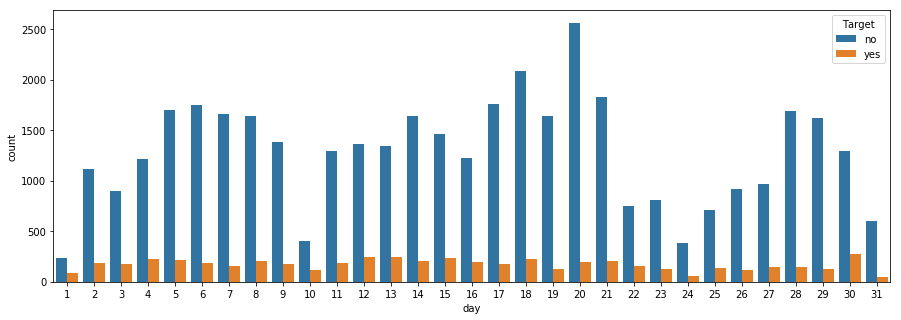

In [44]:
print(pd.crosstab(bank_df['day'],bank_df['Target'],normalize='index').mul(100).sort_values(by='yes',ascending=False))
plt.figure(figsize=(15,5))
sns.countplot(x='day',hue='Target',data=bank_df)

Target         no        yes
month                       
mar     48.008386  51.991614
dec     53.271028  46.728972
sep     53.540587  46.459413
oct     56.233062  43.766938
apr     80.320600  19.679400
feb     83.352208  16.647792
aug     88.986714  11.013286
jun     89.777195  10.222805
nov     89.848866  10.151134
jan     89.878831  10.121169
jul     90.906454   9.093546
may     93.280546   6.719454


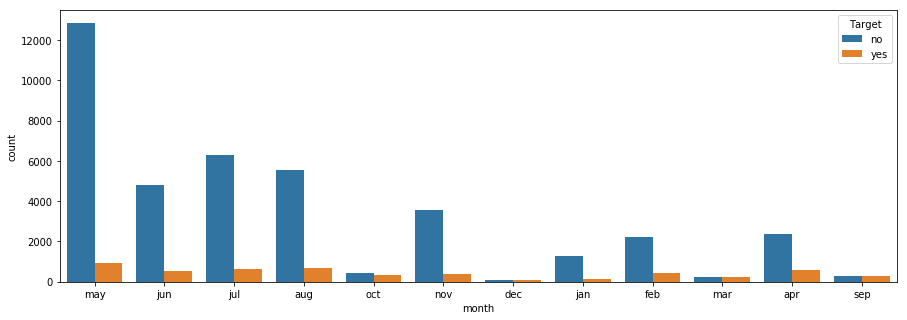

In [45]:
#mar, dec, sep are months where most term deposits were subscribed, however they have least client conatcts made
print(pd.crosstab(bank_df['month'],bank_df['Target'],normalize='index').mul(100).sort_values(by='yes',ascending=False))
plt.figure(figsize=(15,5))
sns.countplot(x='month',hue='Target',data=bank_df)

Target           no        yes
poutcome                      
success   35.274653  64.725347
other     83.315217  16.684783
failure   87.390329  12.609671
unknown   90.838497   9.161503


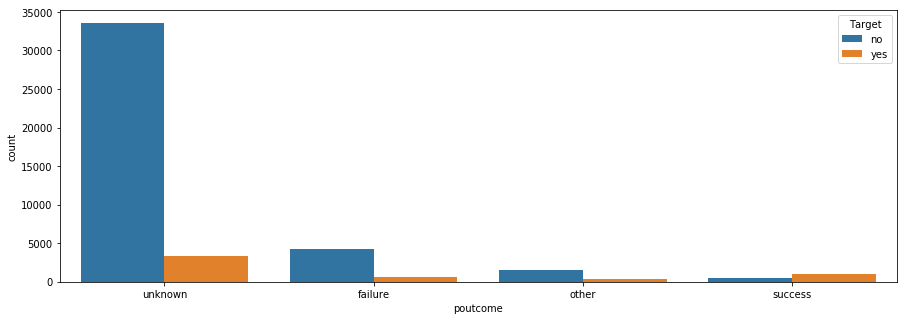

In [46]:
#those who subscribed to previous campaign subscribed to term deposit as well.
#however the number is quite low in data for those subscribed to previous capaign.
print(pd.crosstab(bank_df['poutcome'],bank_df['Target'],normalize='index').mul(100).sort_values(by='yes',ascending=False))
plt.figure(figsize=(15,5))
sns.countplot(x='poutcome',hue='Target',data=bank_df)

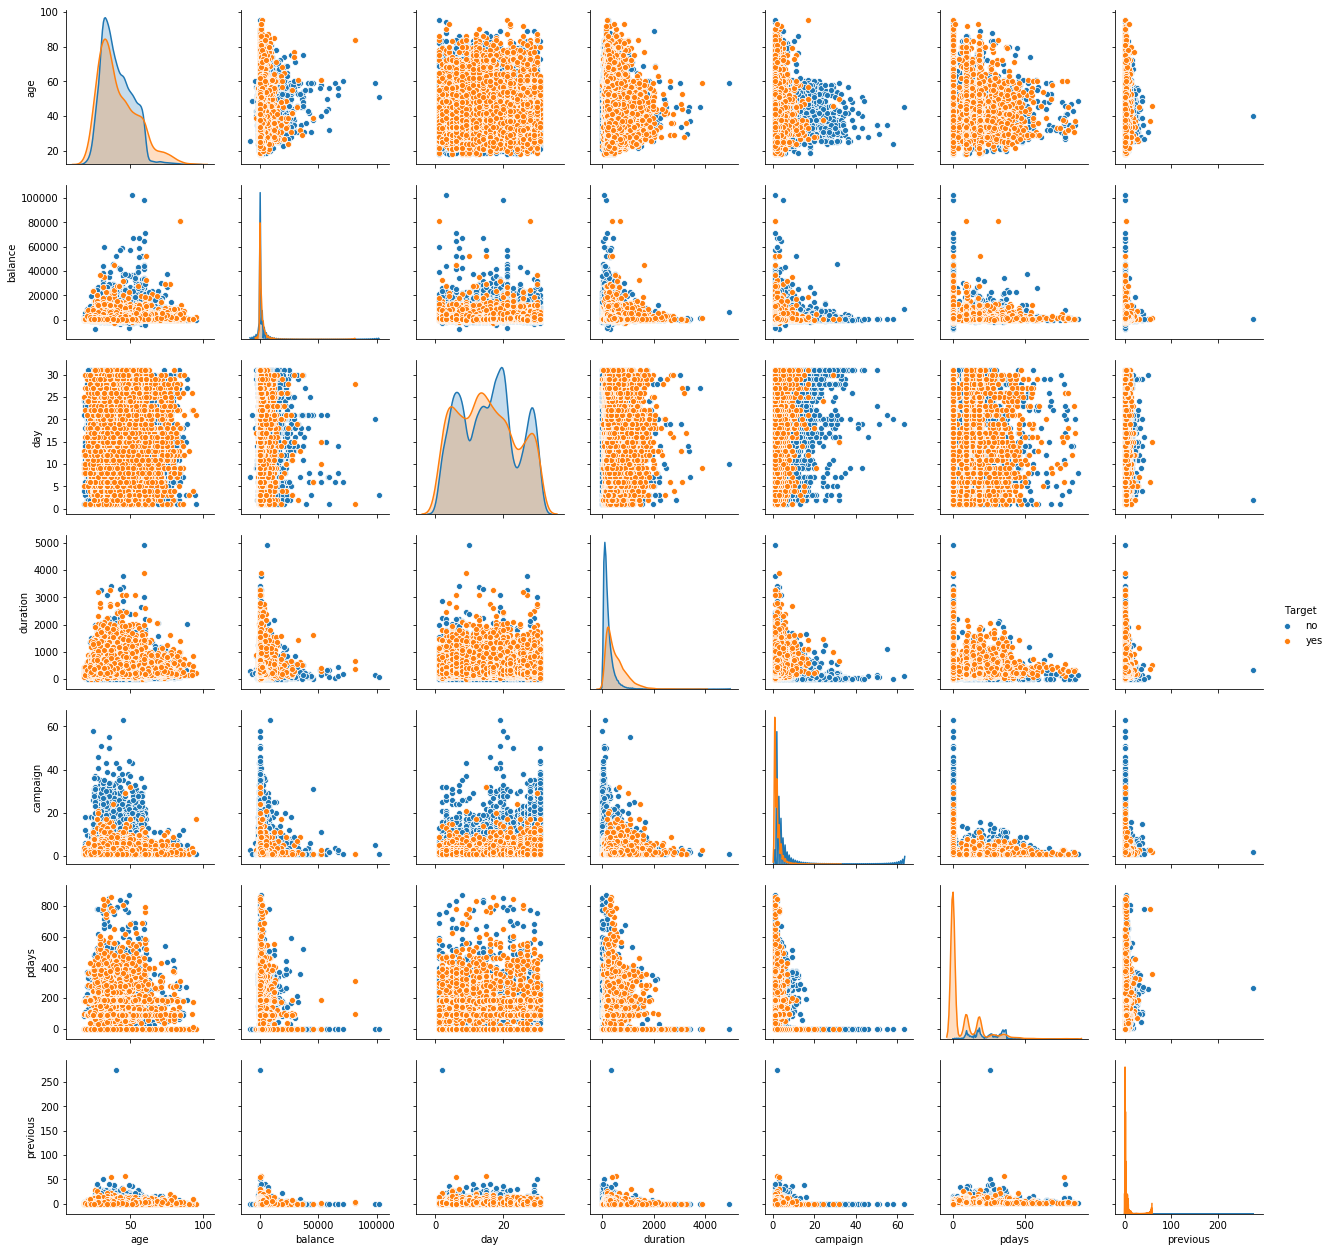

In [47]:
#campaign with lower numver of conatcts have higher chance of getting converted
sns.pairplot(bank_df,hue='Target')

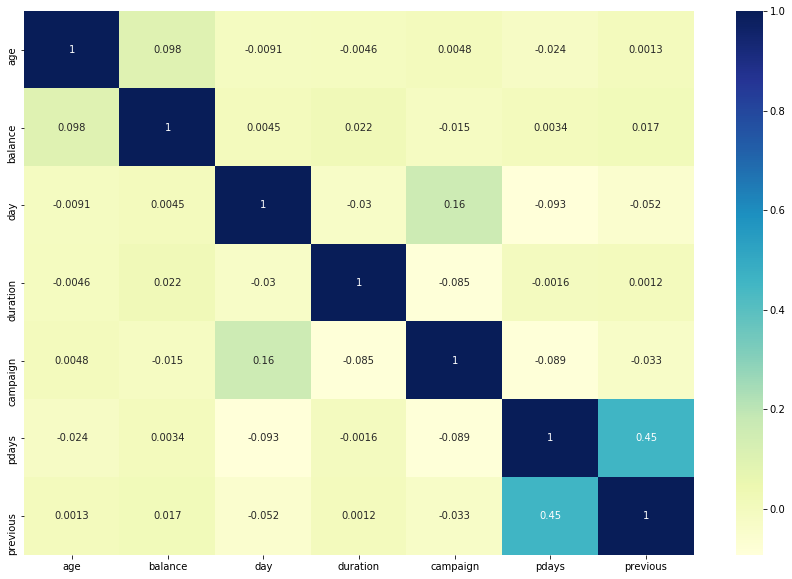

In [48]:
#none of the variables seems to be highly correlated to each other, lets try dividing them into categories
bank_corr=bank_df.corr()
plt.subplots(figsize =(15, 10)) 
sns.heatmap(bank_corr,cmap="YlGnBu",annot=True)

In [49]:
## Binning the variables to overcome the skweness, to deal with outliers

In [50]:
#Binning Balance
def bal_group(series):
    if series < 0:
        return "negative balance"
    elif 0 <= series < 500:
        return "low balance"
    elif 500 <= series < 2000:
        return "moderate balance"
    elif 2000 <= series < 10000:
        return "high balance"
    elif 10000 <= series:
        return "very high balance"

bank_df['bal_group'] = bank_df['balance'].apply(bal_group)


In [51]:
bank_df['bal_group'].value_counts()
pd.crosstab(bank_df['bal_group'],bank_df['Target'])

Target                no   yes
bal_group                     
high balance        6403  1274
low balance        17899  1972
moderate balance   11370  1698
negative balance    3556   210
very high balance    694   135

In [52]:
#Binning Campaign
def camp_group(series):
    if series <= 1:
        return "1st Contact"
    elif 2 <= series <= 5:
        return "2-5 Contacts"
    elif 6 <= series <= 10:
        return "6-10 Contacts"
    elif 10 < series:
        return "More than 10 Contacts"

bank_df['camp_group'] = bank_df['campaign'].apply(camp_group)

In [53]:
#Most of people subscribe with lower number of contacts
bank_df['camp_group'].value_counts()
pd.crosstab(bank_df['camp_group'],bank_df['Target'])

Target                    no   yes
camp_group                        
1st Contact            14983  2561
2-5 Contacts           20837  2475
6-10 Contacts           2953   206
More than 10 Contacts   1149    47

In [54]:
#Binning Campaign
def dura_group(series):
    if series <= 120:
        return "<2 mints Duration"
    elif 120 < series <= 600:
        return "<2-10 mints Duration"
    elif 600 < series <= 1800:
        return "<10-30 mints Contacts"
    elif 1800 < series:
        return "More than 30 mints Contacts"

bank_df['dura_group'] = bank_df['duration'].apply(dura_group)

In [55]:
#
bank_df['dura_group'].value_counts()
pd.crosstab(bank_df['dura_group'],bank_df['Target'])

Target                          no   yes
dura_group                              
<10-30 mints Contacts         1905  1778
<2 mints Duration            13833   211
<2-10 mints Duration         24132  3245
More than 30 mints Contacts     52    55

In [56]:
bank_df_1=bank_df.copy()
bank_df.drop(['balance','campaign'],axis=1,inplace=True)

In [57]:
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'day', 'month', 'duration', 'pdays', 'previous', 'poutcome',
       'Target', 'bal_group', 'camp_group', 'dura_group'],
      dtype='object')

In [58]:
#Converting day to categorical
bank_df['day']=bank_df['day'].astype('category')
bank_df['Target']=bank_df['Target'].astype('category')

In [59]:
bank_df.dtypes

age              int64
job             object
marital         object
education       object
default         object
housing         object
loan            object
contact         object
day           category
month           object
duration         int64
pdays            int64
previous         int64
poutcome        object
Target        category
bal_group       object
camp_group      object
dura_group      object
dtype: object

In [60]:
# creating a dict file  
label = {'yes': 1,'no': 0} 
bank_df.loan = [label[item] for item in bank_df.loan]
bank_df.default = [label[item] for item in bank_df.default]
bank_df.Target = [label[item] for item in bank_df.Target]

In [61]:
bank_df.head()

age           job  marital  education  default housing  loan  contact day  \
0   58    management  married   tertiary        0     yes     0  unknown   5   
1   44    technician   single  secondary        0     yes     0  unknown   5   
2   33  entrepreneur  married  secondary        0     yes     1  unknown   5   
3   47   blue-collar  married    unknown        0     yes     0  unknown   5   
4   33       unknown   single    unknown        0      no     0  unknown   5   

  month  duration  pdays  previous poutcome  Target         bal_group  \
0   may       261     -1         0  unknown       0      high balance   
1   may       151     -1         0  unknown       0       low balance   
2   may        76     -1         0  unknown       0       low balance   
3   may        92     -1         0  unknown       0  moderate balance   
4   may       198     -1         0  unknown       0       low balance   

    camp_group            dura_group  
0  1st Contact  <2-10 mints Duration  
1  1st Contact  <2-10 mints Duration  
2  1st Contact     <2 mints Duration  
3  1st Contact     <2 mints Duration  
4  1st Contact  <2-10 mints Duration

In [62]:
bank_df_obj=pd.DataFrame(bank_df.select_dtypes(include='object'))
bank_df_obj=pd.get_dummies(bank_df_obj)

In [63]:
bank_df_2 = pd.concat([bank_df,bank_df_obj], axis=1)

In [64]:
print(bank_df_2.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'day', 'month', 'duration', 'pdays', 'previous', 'poutcome',
       'Target', 'bal_group', 'camp_group', 'dura_group', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'housing_no', 'housing_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'bal_group_high balance', 'bal_group_l

In [65]:
bank_df_3=bank_df_2.drop(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'day', 
                          'month','bal_group', 'camp_group','duration','poutcome','dura_group'],axis=1)

In [66]:
bank_df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 57 columns):
age                                       45211 non-null int64
pdays                                     45211 non-null int64
previous                                  45211 non-null int64
Target                                    45211 non-null int64
job_admin.                                45211 non-null uint8
job_blue-collar                           45211 non-null uint8
job_entrepreneur                          45211 non-null uint8
job_housemaid                             45211 non-null uint8
job_management                            45211 non-null uint8
job_retired                               45211 non-null uint8
job_self-employed                         45211 non-null uint8
job_services                              45211 non-null uint8
job_student                               45211 non-null uint8
job_technician                            45211 non-null uint8
job_unemp

In [67]:
bank_df_3.shape

(45211, 57)

In [68]:
#Test Train Split
X=bank_df_3.drop(['Target'],axis=1)
y=bank_df_3['Target']

In [69]:
#Test Train Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Decision Trees

In [94]:
from sklearn.tree import DecisionTreeClassifier

In [95]:
dt_algo = DecisionTreeClassifier(random_state=101)
dt_algo.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=101,
            splitter='best')

In [96]:
y_pred = dt_algo.predict(X_test)
print(dt_algo.score(X_train, y_train))
print(dt_algo.score(X_test , y_test))

0.9958921856732076
0.8680330286051312


confusion matrix: 
 [[11059   926]
 [  864   715]]
accuracy 0.8680330286051312
precision 0.4357099329677026
recall 0.45281823939202026
area-under-curve metric:  0.6877774968340994


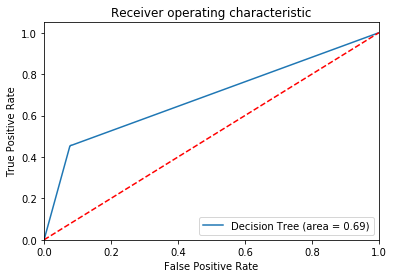

In [97]:
#the model overfits, its accuracy on test data is good. However recall and precision are low. We want model
#to predict better so as we don't waste time in handling customers which are not likely to subscribe 
# metrics
from sklearn import metrics

#confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print("confusion matrix: \n",confusion_matrix)
# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))
# precision
print("precision", metrics.precision_score(y_test, y_pred))
# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred))
#Area under curve
print("area-under-curve metric: ", metrics.roc_auc_score(y_test, y_pred))

#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
dt_roc_auc = roc_auc_score(y_test, dt_algo.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, dt_algo.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [98]:
#Regularization using GridSearchCV
dt_algo1 = DecisionTreeClassifier(random_state = 102)
params = {"max_depth": np.arange(8, 20),"max_features":np.arange(15,55,5),'min_samples_leaf': range(45, 65, 5),
    'min_samples_split': range(2,5),
    'criterion': ["entropy", "gini"]}

In [99]:
from sklearn.model_selection import GridSearchCV
model_cv = GridSearchCV(estimator = dt_algo1, param_grid = params, 
                        scoring= 'accuracy',
                        cv=3,
                        verbose = 1,
                       return_train_score=True)  

In [100]:
model_cv.fit(X_train, y_train) 

# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
#cv_results

Fitting 3 folds for each of 2304 candidates, totalling 6912 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 6912 out of 6912 | elapsed: 19.6min finished


In [101]:
#parameters best value
best_score = model_cv.best_score_
best = model_cv.best_params_
best

{'criterion': 'entropy',
 'max_depth': 14,
 'max_features': 40,
 'min_samples_leaf': 50,
 'min_samples_split': 2}

In [102]:
#using best parameter values
dt_algo_best = DecisionTreeClassifier(max_depth= 14, max_features= 40,random_state=103,min_samples_leaf=50,
                                     min_samples_split=2,criterion='entropy')
dt_algo_best.fit(X_train, y_train)
# predict
y_pred1 = dt_algo_best.predict(X_test)

confusion matrix: 
 [[11468   517]
 [  924   655]]
accuracy:  0.8937629017988794
precision:  0.5588737201365188
recall:  0.4148195060164661
area-under-curve metric:  0.6858411255572527


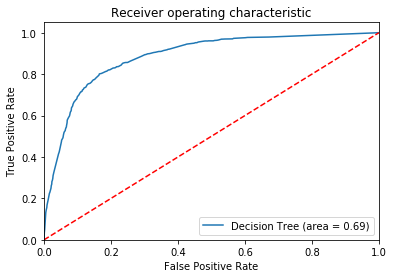

In [103]:
#accuracy and precision increase but recall decreases though by less amount and also roc_auc metric 
#decreases by .04.

# metrics
# confusion matrix
print("confusion matrix: \n", metrics.confusion_matrix(y_test, y_pred1))
# accuracy
print("accuracy: ", metrics.accuracy_score(y_test, y_pred1))
# precision
print("precision: ", metrics.precision_score(y_test, y_pred1))
# recall/sensitivity
print("recall: ", metrics.recall_score(y_test, y_pred1))
#Area under curve
print("area-under-curve metric: ", metrics.roc_auc_score(y_test, y_pred1))

#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
dt_roc_auc1 = roc_auc_score(y_test, dt_algo_best.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, dt_algo_best.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc1)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC_DecisionTree')
plt.show()

In [104]:
#Feature Importance
dt_imp_feature=pd.DataFrame(dt_algo_best.feature_importances_, columns = ["Imp"], index = X_train.columns)
dt_imp_feature.sort_values(by="Imp",ascending=False)[:15]
#dt_imp_feature.sort_values(by="Imp",ascending=False)

Imp
dura_group_<2 mints Duration     0.204043
dura_group_<2-10 mints Duration  0.191971
poutcome_success                 0.190999
contact_unknown                  0.073704
housing_yes                      0.048281
pdays                            0.043303
age                              0.041395
month_jul                        0.028876
month_aug                        0.021729
month_jan                        0.020097
month_may                        0.014994
month_mar                        0.013045
month_nov                        0.012037
month_jun                        0.010922
month_feb                        0.008137

In [105]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/release/bin/'

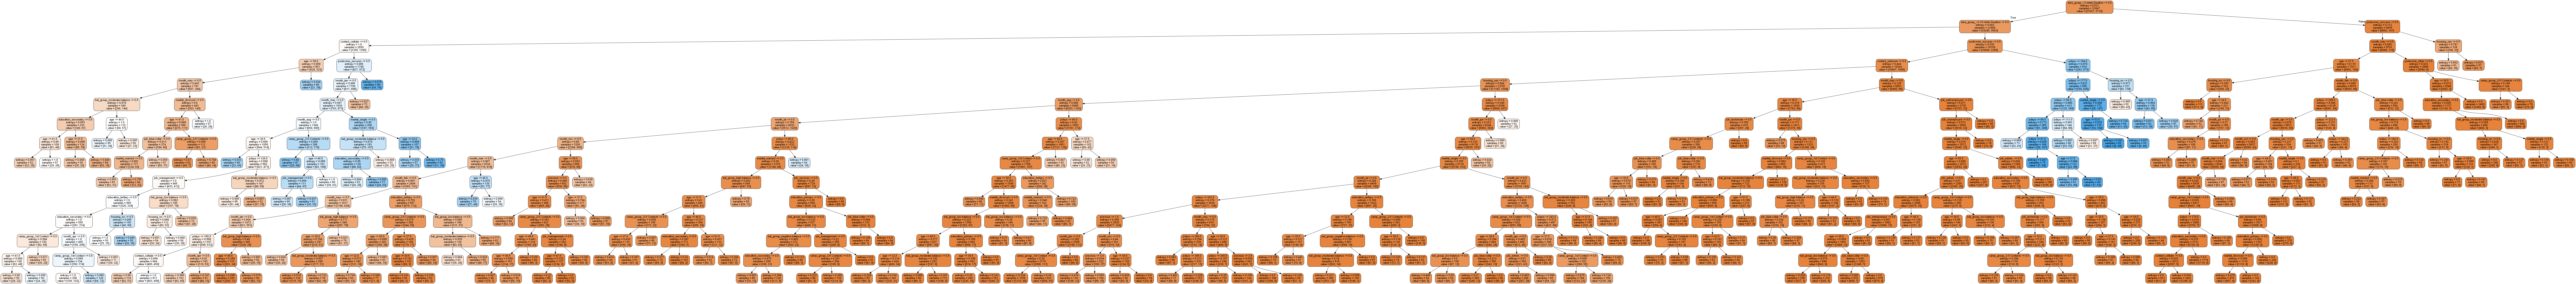

In [106]:
#Tree structure
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

features = X_train.columns
dot_data = StringIO()  
export_graphviz(dt_algo_best, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

## BAGGING Algorithm

In [82]:
from sklearn.ensemble import BaggingClassifier
bg_bank = BaggingClassifier(random_state=150)
bg_bank.fit(X_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=None, oob_score=False, random_state=150,
         verbose=0, warm_start=False)

In [83]:
y_pred_bg = bg_bank.predict(X_test)
print(bg_bank.score(X_train, y_train))
print(bg_bank.score(X_test , y_test))

0.9869181912977534
0.8891182542023002


In [84]:
#this algo seems overfit, also its recall is low
#metrices
#confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_bg)
print("confusion matrix: \n",confusion_matrix)
# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred_bg))
# precision
print("precision", metrics.precision_score(y_test, y_pred_bg))
# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred_bg))
#Area under curve
print("area-under-curve metric: ", metrics.roc_auc_score(y_test, y_pred_bg))

confusion matrix: 
 [[11418   567]
 [  937   642]]
accuracy 0.8891182542023002
precision 0.5310173697270472
recall 0.4065864471184294
area-under-curve metric:  0.6796386553489517


In [85]:
#Regularization using GridSearchCV
bg_bank1 = BaggingClassifier(random_state=151)
params = {"n_estimators": np.arange(30,50,2),"max_features":[0.78,0.8,0.82,0.84],
          'max_samples': [0.45,0.5,0.55,0.6],'oob_score':['True']}
    
model_cv_bg = GridSearchCV(estimator = bg_bank1, param_grid = params, 
                        scoring= 'accuracy',
                        cv=3,
                        verbose = 1,
                       return_train_score=True)
model_cv_bg.fit(X_train, y_train) 

Fitting 3 folds for each of 160 candidates, totalling 480 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed: 56.0min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=None, oob_score=False, random_state=151,
         verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': array([30, 32, 34, 36, 38, 40, 42, 44, 46, 48]), 'max_features': [0.78, 0.8, 0.82, 0.84], 'max_samples': [0.45, 0.5, 0.55, 0.6], 'oob_score': ['True']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [86]:
# results of grid search CV
cv_results_bg = pd.DataFrame(model_cv_bg.cv_results_)
#cv_results_bg

In [87]:
#parameters best value
best_score_bg = model_cv_bg.best_score_
best_bg = model_cv_bg.best_params_
best_bg

{'max_features': 0.8,
 'max_samples': 0.45,
 'n_estimators': 44,
 'oob_score': 'True'}

In [88]:
bg_algo_best = BaggingClassifier(max_features= 0.8, max_samples=0.8,n_estimators=42,oob_score=True,random_state=152)
bg_algo_best.fit(X_train, y_train)
# predict
y_pred1_bg = bg_algo_best.predict(X_test)

In [89]:
#Accuracy improves and so does precision, but recall drops .
# metrics
# confusion matrix
print("confusion matrix: \n", metrics.confusion_matrix(y_test, y_pred1_bg))
# accuracy
print("accuracy: ", metrics.accuracy_score(y_test, y_pred1_bg))
# precision
print("precision: ", metrics.precision_score(y_test, y_pred1_bg))
# recall/sensitivity
print("recall: ", metrics.recall_score(y_test, y_pred1_bg))
#Area under curve
print("area-under-curve metric: ", metrics.roc_auc_score(y_test, y_pred1_bg))

confusion matrix: 
 [[11510   475]
 [  966   613]]
accuracy:  0.8937629017988794
precision:  0.5634191176470589
recall:  0.3882203926535782
area-under-curve metric:  0.6742937591136059


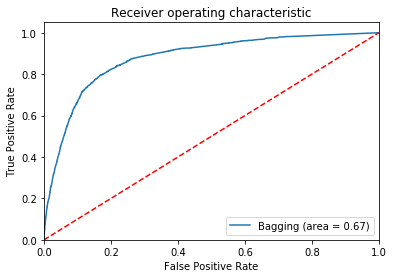

Imp
0   0.035809
39  0.032354
37  0.030884
27  0.029154
29  0.028816
28  0.027065
34  0.026581
15  0.026460
40  0.026145
3   0.025804
22  0.025677
11  0.025386
32  0.025245
10  0.025018
43  0.024739
13  0.024638
30  0.024536
33  0.024474
6   0.024171
14  0.024144
38  0.023413
8   0.022359
16  0.022298
36  0.021808
26  0.021799
18  0.020757
42  0.020679
9   0.020556
41  0.019900
21  0.019853
35  0.019719
24  0.019350
7   0.019241
19  0.018718
20  0.018698
4   0.018654
23  0.018526
2   0.017609
1   0.017524
25  0.017488
31  0.016640
12  0.016536
5   0.016233
17  0.014542

In [90]:
#ROC
bg_roc_auc = roc_auc_score(y_test, bg_algo_best.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, bg_algo_best.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Bagging (area = %0.2f)' % bg_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC_Bagging')
plt.show()


#Feature Importance
feature_importances = np.mean([ tree.feature_importances_ for tree in bg_algo_best.estimators_], axis=0)
bg_imp_feature=pd.DataFrame(feature_importances, columns = ["Imp"])
bg_imp_feature.sort_values(by="Imp",ascending=False)


## RANDOM FOREST

In [91]:
#RandomForest Algo
from sklearn.ensemble import RandomForestClassifier
rf_bank = RandomForestClassifier(random_state=200)
rf_bank.fit(X_train, y_train)

y_pred_rf = rf_bank.predict(X_test)
print(rf_bank.score(X_train, y_train))
print(rf_bank.score(X_test , y_test))


0.9861282270041394
0.887717487466824


In [92]:
#confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_rf)
print("confusion matrix: \n",confusion_matrix)
# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred_rf))
# precision
print("precision", metrics.precision_score(y_test, y_pred_rf))
# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred_rf))
#Area under curve
print("area-under-curve metric: ", metrics.roc_auc_score(y_test, y_pred_rf))


confusion matrix: 
 [[11467   518]
 [ 1005   574]]
accuracy 0.887717487466824
precision 0.5256410256410257
recall 0.363521215959468
area-under-curve metric:  0.660150261713568


In [93]:
#Regularization using GridSearchCV
rf_bank1 = RandomForestClassifier(random_state = 201,oob_score="True",bootstrap=True)

params = {"n_estimators": np.arange(12,18,2),'criterion': ["entropy"],"max_depth": np.arange(9, 15,2),
          "max_features":np.arange(15,30,5),'min_samples_leaf': range(26, 32, 2),
    'min_samples_split': range(26, 32, 2)}

model_cv_rf = GridSearchCV(estimator = rf_bank1, param_grid = params, 
                        scoring= 'accuracy',
                        cv=3,
                        verbose = 1,
                       return_train_score=True) 
                      
model_cv_rf.fit(X_train, y_train) 

# results of grid search CV
cv_results_rf = pd.DataFrame(model_cv_rf.cv_results_)
#cv_results_rf

Fitting 3 folds for each of 243 candidates, totalling 729 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 729 out of 729 | elapsed: 11.0min finished


In [94]:
#parameters best value
best_score_rf = model_cv_rf.best_score_
best_rf = model_cv_rf.best_params_
best_rf

{'criterion': 'entropy',
 'max_depth': 11,
 'max_features': 25,
 'min_samples_leaf': 26,
 'min_samples_split': 26,
 'n_estimators': 16}

In [95]:
rf_bank_best = RandomForestClassifier(max_depth= 13, max_features= 25,random_state=202,
                                      n_estimators=16,criterion='entropy',
                                     min_samples_leaf=30,min_samples_split=30)
rf_bank_best.fit(X_train, y_train)
# predict
y_pred1_rf = rf_bank_best.predict(X_test)


# metrics
# confusion matrix
print("confusion matrix: \n", metrics.confusion_matrix(y_test, y_pred1_rf))
# accuracy
print("accuracy: ", metrics.accuracy_score(y_test, y_pred1_rf))
# precision
print("precision: ", metrics.precision_score(y_test, y_pred1_rf))
# recall/sensitivity
print("recall: ", metrics.recall_score(y_test, y_pred1_rf))
#Area under curve
print("area-under-curve metric: ", metrics.roc_auc_score(y_test, y_pred1_rf))

confusion matrix: 
 [[11604   381]
 [  991   588]]
accuracy:  0.898849896785609
precision:  0.6068111455108359
recall:  0.3723875870804306
area-under-curve metric:  0.6702989249544832


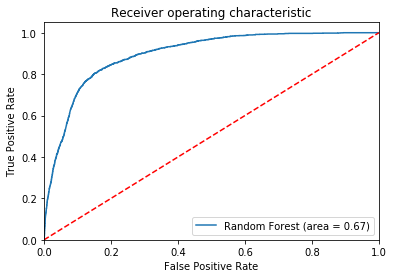

Imp
dura_group_<10-30 mints Contacts  0.195627
poutcome_success                  0.157261
dura_group_<2 mints Duration      0.136603
dura_group_<2-10 mints Duration   0.063114
contact_unknown                   0.057794
age                               0.052225
pdays                             0.048619
housing_no                        0.035650
housing_yes                       0.028679
month_jul                         0.019082
month_aug                         0.015563
month_may                         0.014955
month_mar                         0.014278
month_apr                         0.013891
month_jun                         0.013621

In [96]:
#ROC
rf_roc_auc = roc_auc_score(y_test, rf_bank_best.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf_bank_best.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC_RandomForest')
plt.show()


#Feature Importance
rf_imp_feature=pd.DataFrame(rf_bank_best.feature_importances_, columns = ["Imp"], index = X_train.columns)
rf_imp_feature.sort_values(by="Imp",ascending=False)[:15]

## ADABOOST

In [97]:
#AdaBoost Algo
from sklearn.ensemble import AdaBoostClassifier
# base estimator
tree = DecisionTreeClassifier(max_depth=2)

# adaboost with the tree as base estimator
ada_bank = AdaBoostClassifier(
    base_estimator=tree,
    algorithm="SAMME",random_state=250)
ada_bank.fit(X_train, y_train)

y_pred_ada = ada_bank.predict(X_test)
print(ada_bank.score(X_train, y_train))
print(ada_bank.score(X_test , y_test))

0.898758176130439
0.894426422884105


In [98]:
#confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_ada)
print("confusion matrix: \n",confusion_matrix)
# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred_ada))
# precision
print("precision", metrics.precision_score(y_test, y_pred_ada))
# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred_ada))
#Area under curve
print("area-under-curve metric: ", metrics.roc_auc_score(y_test, y_pred_ada))

confusion matrix: 
 [[11504   481]
 [  951   628]]
accuracy 0.894426422884105
precision 0.5662759242560865
recall 0.3977200759974667
area-under-curve metric:  0.6787932878944363


In [99]:
#Regularization using GridSearchCV

ada_bank1 = AdaBoostClassifier(base_estimator=tree,algorithm="SAMME",random_state=251)

# parameter grid
params = {"base_estimator__max_depth" : np.arange(2, 8,2),"n_estimators": [150,200,250],
         "learning_rate":[0.2,0.3,0.4]}

model_cv_ada = GridSearchCV(estimator = ada_bank1, param_grid = params, 
                        scoring= 'accuracy',
                        cv=3,
                        verbose = 1,
                       return_train_score=True) 
                       
                       
model_cv_ada.fit(X_train, y_train) 

# results of grid search CV
cv_results_ada = pd.DataFrame(model_cv_ada.cv_results_)
#cv_results_ada

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed: 22.9min finished


In [100]:
#parameters best value
best_score_ada = model_cv_ada.best_score_
best_ada = model_cv_ada.best_params_
best_ada

{'base_estimator__max_depth': 4, 'learning_rate': 0.3, 'n_estimators': 200}

In [101]:
# base estimator
tree = DecisionTreeClassifier(max_depth=4)
ada_bank_best = AdaBoostClassifier(base_estimator=tree , n_estimators=200,
                                   random_state=252,learning_rate=0.3)
ada_bank_best.fit(X_train, y_train)
# predict
y_pred1_ada = ada_bank_best.predict(X_test)

# metrics
# confusion matrix
print("confusion matrix: \n", metrics.confusion_matrix(y_test, y_pred1_ada))
# accuracy
print("accuracy: ", metrics.accuracy_score(y_test, y_pred1_ada))
# precision
print("precision: ", metrics.precision_score(y_test, y_pred1_ada))
# recall/sensitivity
print("recall: ", metrics.recall_score(y_test, y_pred1_ada))
#Area under curve
print("area-under-curve metric: ", metrics.roc_auc_score(y_test, y_pred1_ada))

confusion matrix: 
 [[11487   498]
 [  918   661]]
accuracy:  0.8956060159245061
precision:  0.5703192407247627
recall:  0.41861937935402155
area-under-curve metric:  0.6885337197145577


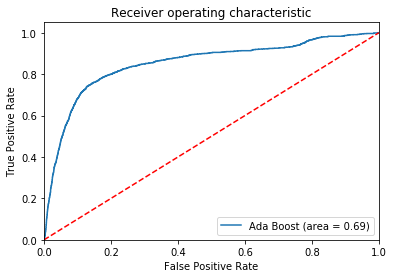

Imp
age                               0.174445
pdays                             0.166281
previous                          0.043180
dura_group_<2 mints Duration      0.027634
dura_group_<10-30 mints Contacts  0.023575
camp_group_1st Contact            0.021526
month_aug                         0.021370
housing_no                        0.021254
bal_group_high balance            0.019979
contact_unknown                   0.018147
job_management                    0.017178
month_jul                         0.016978
month_jun                         0.016624
bal_group_low balance             0.016614
marital_single                    0.015962

In [102]:
#ROC
ada_roc_auc = roc_auc_score(y_test, ada_bank_best.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, ada_bank_best.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Ada Boost (area = %0.2f)' % ada_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC_AdaBoost')
plt.show()

#Feature Importance
ada_imp_feature=pd.DataFrame(ada_bank_best.feature_importances_, columns = ["Imp"], index = X_train.columns)
ada_imp_feature.sort_values(by="Imp",ascending=False)[:15]

## Gradient Boost

In [70]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV

In [71]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_bank = GradientBoostingClassifier(random_state=300)
gbc_bank.fit(X_train, y_train)

y_pred_gbc = gbc_bank.predict(X_test)
print(gbc_bank.score(X_train, y_train))
print(gbc_bank.score(X_test , y_test))

0.9065630233513445
0.8989236213506341


In [72]:
#confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_gbc)
print("confusion matrix: \n",confusion_matrix)
# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred_gbc))
# precision
print("precision", metrics.precision_score(y_test, y_pred_gbc))
# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred_gbc))
#Area under curve
print("area-under-curve metric: ", metrics.roc_auc_score(y_test, y_pred_gbc))


confusion matrix: 
 [[11630   355]
 [ 1016   563]]
accuracy 0.8989236213506341
precision 0.6132897603485838
recall 0.3565547815072831
area-under-curve metric:  0.6634672113627362


In [79]:
###As this run is taking very long, adjusting 1 parameter in grid search. However use trial and error by passing single 
###value in fit
#Regularization using GridSearchCV
gbc_bank = GradientBoostingClassifier(random_state=301)
params = {"n_estimators": [200,210,220]}#,"learning_rate":[0.1,0.2],"max_depth": np.arange(10, 16)}
#          "max_features":np.arange(36,50,2),'min_samples_leaf': range(45, 60, 5)}

model_cv_gbc = GridSearchCV(estimator = gbc_bank, param_grid = params, 
                        scoring= 'accuracy',
                        cv=3,
                        verbose = 1,
                       return_train_score=True) 


In [74]:
model_cv_gbc.fit(X_train, y_train) 

# results of grid search CV
cv_results_gbc = pd.DataFrame(model_cv_gbc.cv_results_)
#cv_results_gbc

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.8min finished


In [75]:
#parameters best value
best_score_gbc = model_cv_gbc.best_score_
best_gbc = model_cv_gbc.best_params_
best_gbc

{'n_estimators': 220}

In [91]:
#After fitting best parameters
gbc_bank_best = GradientBoostingClassifier(learning_rate= 0.1, n_estimators= 220,max_depth= 14, 
                                           max_features= 42,random_state=103,min_samples_leaf=50,min_samples_split=50)

gbc_bank_best.fit(X_train, y_train)
# predict
y_pred1_gbc = gbc_bank_best.predict(X_test)

confusion matrix: 
 [[11429   556]
 [  861   718]]
accuracy:  0.895532291359481
precision:  0.5635792778649922
recall:  0.45471817606079795
area-under-curve metric:  0.7041634267871782


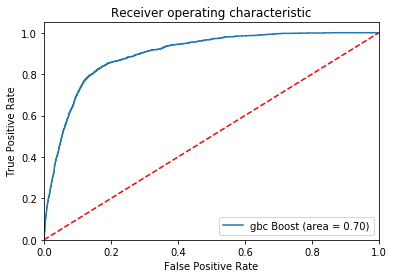

In [111]:
# metrics
# confusion matrix
print("confusion matrix: \n", metrics.confusion_matrix(y_test, y_pred1_gbc))
# accuracy
print("accuracy: ", metrics.accuracy_score(y_test, y_pred1_gbc))
# precision
print("precision: ", metrics.precision_score(y_test, y_pred1_gbc))
# recall/sensitivity
print("recall: ", metrics.recall_score(y_test, y_pred1_gbc))
#Area under curve
print("area-under-curve metric: ", metrics.roc_auc_score(y_test, y_pred1_gbc))


#ROC
gbc_roc_auc = roc_auc_score(y_test, gbc_bank_best.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, gbc_bank_best.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='gbc Boost (area = %0.2f)' % gbc_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC_GradientBoost')
plt.show()

In [108]:
#Feature Importance
gbc_imp_feature=pd.DataFrame(gbc_bank_best.feature_importances_, columns = ["Imp"], index = X_train.columns)
gbc_imp_feature.sort_values(by="Imp",ascending=False)[:15]

Imp
dura_group_<10-30 mints Contacts  0.205303
poutcome_success                  0.166364
age                               0.118255
pdays                             0.088834
dura_group_<2 mints Duration      0.044122
dura_group_<2-10 mints Duration   0.024058
month_mar                         0.023844
month_jun                         0.023513
month_apr                         0.021347
month_oct                         0.019421
housing_no                        0.018756
housing_yes                       0.017176
contact_unknown                   0.016926
camp_group_1st Contact            0.012979
previous                          0.012857

## XGBoost Algo

In [104]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

train_data = np.array(X_train)
test_data = np.array(X_test)

xgb_bank = XGBClassifier(random_state=400)
xgb_bank.fit(train_data, y_train)

y_pred_xgb = xgb_bank.predict(test_data)
print(xgb_bank.score(train_data, y_train))
print(xgb_bank.score(test_data , y_test))

0.9032135747464215
0.8994396933058095


In [105]:
#confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_xgb)
print("confusion matrix: \n",confusion_matrix)
# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred_xgb))
# precision
print("precision", metrics.precision_score(y_test, y_pred_xgb))
# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred_xgb))
#Area under curve
print("area-under-curve metric: ", metrics.roc_auc_score(y_test, y_pred_xgb))

confusion matrix: 
 [[11719   266]
 [ 1098   481]]
accuracy 0.8994396933058095
precision 0.643908969210174
recall 0.3046231792273591
area-under-curve metric:  0.641214384774297


In [106]:
#Regularization using GridSearchCV - 1st Iteration

params1 = {
    "colsample_bytree": [i/100.0 for i in range(78,82,2)],
    "learning_rate": [0.2,0.3], 
    "n_estimators": [142,144,146],
    "subsample": [i/100.0 for i in range(80,84,2)]
}

model_cv_xgb1 = GridSearchCV(estimator = xgb_bank, param_grid = params1, 
                        scoring= 'accuracy',
                        cv=3,
                        verbose = 1,
                       return_train_score=True) 


In [107]:
model_cv_xgb1.fit(train_data,y_train) 

# results of grid search CV
cv_results_xgb1 = pd.DataFrame(model_cv_xgb1.cv_results_)
cv_results_xgb1

#parameters best value
best_score_xgb1 = model_cv_xgb1.best_score_
best_xgb1 = model_cv_xgb1.best_params_
best_xgb1

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:  8.4min finished


{'colsample_bytree': 0.8,
 'learning_rate': 0.2,
 'n_estimators': 144,
 'subsample': 0.82}

In [108]:
#Choosing best parameter from 1st Iteration
xgb_bank_best1 = XGBClassifier(colsample_bytree=0.8,learning_rate=0.2,n_estimators=144,subsample=0.82)
xgb_bank_best1.fit(train_data, y_train)
# predict
y_pred_xgb1 = xgb_bank_best1.predict(test_data)

#confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_xgb1)
print("confusion matrix: \n",confusion_matrix)
# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred_xgb1))
# precision
print("precision", metrics.precision_score(y_test, y_pred_xgb1))
# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred_xgb1))
#Area under curve
print("area-under-curve metric: ", metrics.roc_auc_score(y_test, y_pred_xgb1))

confusion matrix: 
 [[11573   412]
 [  975   604]]
accuracy 0.8977440283102329
precision 0.594488188976378
recall 0.3825205826472451
area-under-curve metric:  0.6740721394671353


In [109]:
#Regularization using GridSearchCV - 2nd Iteration

params2 = {
    'min_child_weight':[4,5,6,7],"max_depth": [2,4,6],
}

model_cv_xgb2 = GridSearchCV(estimator = xgb_bank_best1, param_grid = params2, 
                        scoring= 'accuracy',
                        cv=3,
                        verbose = 1,
                       return_train_score=True) 

In [110]:
#Choosing best parameter obtained from 2nd Iteration an apply to model of 1st iteration
model_cv_xgb2.fit(train_data,y_train) 

# results of grid search CV
cv_results_xgb2 = pd.DataFrame(model_cv_xgb2.cv_results_)
cv_results_xgb2

#parameters best value
best_score_xgb2 = model_cv_xgb2.best_score_
best_xgb2 = model_cv_xgb2.best_params_
best_xgb2

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  5.5min finished


{'max_depth': 4, 'min_child_weight': 6}

In [111]:
xgb_bank_best2 = XGBClassifier(colsample_bytree=0.8,learning_rate=0.2,n_estimators=144,subsample=0.82,
                              min_child_weight=6,max_depth=4)
xgb_bank_best2.fit(train_data, y_train)
# predict
y_pred_xgb2 = xgb_bank_best1.predict(test_data)

#confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_xgb2)
print("confusion matrix: \n",confusion_matrix)
# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred_xgb2))
# precision
print("precision", metrics.precision_score(y_test, y_pred_xgb2))
# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred_xgb2))
#Area under curve
print("area-under-curve metric: ", metrics.roc_auc_score(y_test, y_pred_xgb2))

confusion matrix: 
 [[11573   412]
 [  975   604]]
accuracy 0.8977440283102329
precision 0.594488188976378
recall 0.3825205826472451
area-under-curve metric:  0.6740721394671353


In [112]:
#Regularization using GridSearchCV - 3rd Iteration

params3 = {
    'gamma':[0.3,0.35,0.4,0.45]
}

model_cv_xgb3 = GridSearchCV(estimator = xgb_bank_best2, param_grid = params3, 
                        scoring= 'accuracy',
                        cv=3,
                        verbose = 1,
                       return_train_score=True) 
                       
                       
model_cv_xgb3.fit(train_data,y_train) 

# results of grid search CV
cv_results_xgb3 = pd.DataFrame(model_cv_xgb3.cv_results_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  1.7min finished


In [113]:
#parameters best value
best_score_xgb3 = model_cv_xgb3.best_score_
best_xgb3 = model_cv_xgb3.best_params_
best_xgb3

{'gamma': 0.4}

In [114]:
xgb_bank_best3 = XGBClassifier(colsample_bytree=0.8,learning_rate=0.2,n_estimators=144,subsample=0.82,
                              min_child_weight=6,max_depth=4,gamma=0.4)
xgb_bank_best3.fit(train_data, y_train)
# predict
y_pred_xgb3 = xgb_bank_best3.predict(test_data)


#confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_xgb3)
print("confusion matrix: \n",confusion_matrix)
# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred_xgb3))
# precision
print("precision", metrics.precision_score(y_test, y_pred_xgb3))
# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred_xgb3))
#Area under curve
print("area-under-curve metric: ", metrics.roc_auc_score(y_test, y_pred_xgb3))

confusion matrix: 
 [[11552   433]
 [  939   640]]
accuracy 0.898849896785609
precision 0.5964585274930102
recall 0.4053198226725776
area-under-curve metric:  0.6845956643609029


In [115]:
#Regularization using GridSearchCV - 4th Iteration

params4 = {
    'reg_lambda':[1e-2,0.05,0.1]
}

model_cv_xgb4 = GridSearchCV(estimator = xgb_bank_best3, param_grid = params4, 
                        scoring= 'accuracy',
                        cv=3,
                        verbose = 1,
                       return_train_score=True) 
                       
                       
model_cv_xgb4.fit(train_data,y_train) 

# results of grid search CV
cv_results_xgb4 = pd.DataFrame(model_cv_xgb4.cv_results_)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.2min finished


In [116]:
#parameters best value
best_score_xgb4 = model_cv_xgb4.best_score_
best_xgb4 = model_cv_xgb4.best_params_
best_xgb4

{'reg_lambda': 0.05}

In [117]:
xgb_bank_best4 = XGBClassifier(colsample_bytree=0.8,learning_rate=0.2,n_estimators=144,subsample=0.82,
                              min_child_weight=6,max_depth=4,gamma=0.4,reg_lambda=0.05)
xgb_bank_best4.fit(train_data, y_train)
# predict
y_pred_xgb4 = xgb_bank_best4.predict(test_data)


#confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_xgb4)
print("confusion matrix: \n",confusion_matrix)
# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred_xgb4))
# precision
print("precision", metrics.precision_score(y_test, y_pred_xgb4))
# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred_xgb4))
#Area under curve
print("area-under-curve metric: ", metrics.roc_auc_score(y_test, y_pred_xgb4))

confusion matrix: 
 [[11553   432]
 [  924   655]]
accuracy 0.90002948982601
precision 0.6025758969641214
recall 0.4148195060164661
area-under-curve metric:  0.6893872248480328


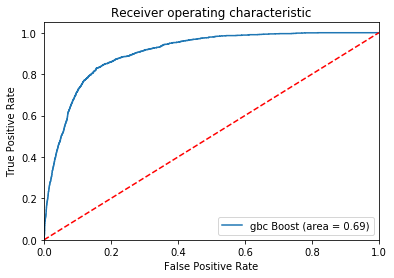

In [118]:
#ROC
Xgbc_roc_auc = roc_auc_score(y_test, y_pred_xgb4)
fpr, tpr, thresholds = roc_curve(y_test, xgb_bank_best4.predict_proba(test_data)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='gbc Boost (area = %0.2f)' % Xgbc_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC_XBBoost')
plt.show()

In [119]:
#Feature Importance
gbc_imp_feature=pd.DataFrame(xgb_bank_best4.feature_importances_, columns = ["Imp"], index = X_train.columns)
gbc_imp_feature.sort_values(by="Imp",ascending=False)[:16]

Imp
poutcome_success                        0.120506
dura_group_<2 mints Duration            0.110791
dura_group_<10-30 mints Contacts        0.110188
contact_unknown                         0.097592
dura_group_<2-10 mints Duration         0.067393
month_oct                               0.031431
month_mar                               0.031178
month_jun                               0.030449
housing_no                              0.029279
poutcome_unknown                        0.023176
month_sep                               0.021310
month_apr                               0.020746
month_dec                               0.016430
dura_group_More than 30 mints Contacts  0.016341
month_jul                               0.011305
marital_single                          0.010726